In [68]:
import numpy as np
import pandas as pd
import seaborn as sns

In [69]:
diwali = pd.read_csv(r'Diwali Sales Data.xls', encoding='iso-8859-1')

In [70]:
diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [71]:
diwali1 = diwali.isnull().sum(axis=0)
diwali2 = diwali1/len(diwali)*100
diwali2

User_ID               0.000000
Cust_name             0.000000
Product_ID            0.000000
Gender                0.000000
Age Group             0.000000
Age                   0.000000
Marital_Status        0.000000
State                 0.000000
Zone                  0.000000
Occupation            0.000000
Product_Category      0.000000
Orders                0.000000
Amount                0.106657
Status              100.000000
unnamed1            100.000000
dtype: float64

In [72]:
# Remove unnecessary columns
diwali = diwali.drop(['Status', 'unnamed1'], axis=1)

In [73]:
diwali2.duplicated().sum()

12

In [74]:
# Remove duplicate rows
diwali = diwali.drop_duplicates()

In [75]:
diwali.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.124300e+04,11243.000000,11243.000000,11243.000000,11231.000000
mean,1.003005e+06,35.422841,0.420261,2.488749,9454.084982
std,1.716141e+03,12.756369,0.493623,1.114960,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001494e+06,27.000000,0.000000,1.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [76]:
diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [77]:
# find most shopping occupation based on amount

diwali['Amount'].idxmax()
diwali.loc[diwali['Amount'].idxmax(), ['Gender', 'State']]

Gender              F
State     Maharashtra
Name: 0, dtype: object

In [78]:
diwali2=diwali.groupby(['State','Gender'])['Amount'].sum().reset_index().sort_values(ascending=False, by='Amount')
diwali2

,State,Gender,Amount
28,Uttar Pradesh,F,13662105.00
20,Maharashtra,F,10551117.00
14,Karnataka,F,9933966.00
4,Delhi,F,8264499.45
29,Uttar Pradesh,M,5683950.00
0,Andhra Pradesh,F,5511219.99
18,Madhya Pradesh,F,5301046.00
21,Maharashtra,M,3853350.00
15,Karnataka,M,3589574.00
5,Delhi,M,3339320.00


In [79]:
diwali3=diwali.groupby(['Product_Category','Gender'])['Amount'].sum().reset_index().sort_values(ascending=False, by='Amount')
diwali3

,Product_Category,Gender,Amount
12,Food,F,24176102.50
14,Footwear & Shoes,F,11534547.45
6,Clothing & Apparel,F,11479103.00
10,Electronics & Gadgets,F,11004923.00
13,Food,M,9757781.00
7,Clothing & Apparel,M,5005369.00
11,Electronics & Gadgets,M,4602734.00
15,Footwear & Shoes,M,4040662.00
16,Furniture,F,3394642.99
18,Games & Toys,F,3045258.00


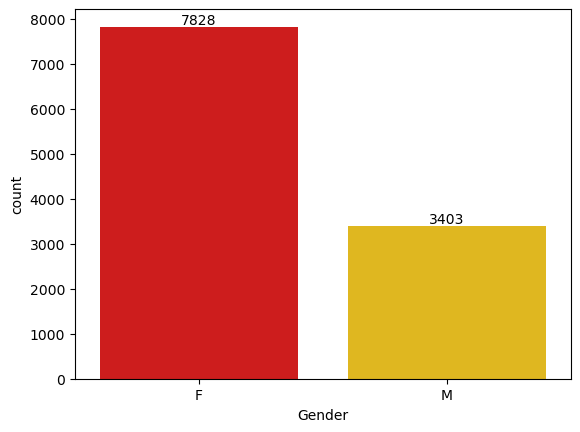

In [90]:
ax = sns.countplot(x='Gender', data=diwali, palette='hot')

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

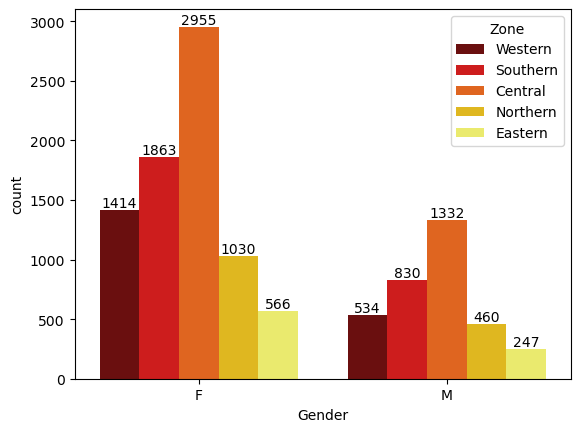

In [93]:
ax = sns.countplot(x='Gender', data=diwali, hue='Zone', palette='hot')

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

In [80]:
diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [81]:
diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [82]:
# Drop rows with missing values in the 'Amount' column
diwali = diwali.dropna(subset=['Amount'])

In [83]:
diwali

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0
